In [1]:
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
class0_len = 1000
X0 = np.random.normal((0,1,2), (1,2,2), (class0_len,3))
y0 = [0]*class0_len

class1_len = 2000
X1 = np.random.normal((1,1,-1), (3,1,1), (class1_len, 3))
y1 = [1]*class1_len

In [4]:
X = np.concatenate((X0, X1))
y = y0+y1

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=24)

In [7]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

0.8951111111111111
0.888


In [24]:
def perf_measure(y_actual, y_hat):
    # implement a function to return number of true positives, false positives, true negatives and false negatives

    return TP, FP, TN, FN

In [10]:
tp, fp, tn, fn = perf_measure(y_val, clf.predict(X_val))

In [26]:
def print_metrics(tp, fp, tn, fn):
    # implement a function to print main metrics using tp, fp, tn and fn numbers
    pass

lets try to find drawbacks here

## HOMEWORK: think of example when all 4 metrics are high, but model is bad

# F1-Score

<img src="files/f1score.png">

In [27]:
print('F1-Score: ', (tp)/(tp+(fp+fn)/2))

F1-Score:  0.9190751445086706


# ROC Curve, AUC

<img src="files/roc_curve.jpeg">

In [28]:
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)

In [29]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [30]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [31]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [32]:
# calculate score
lr_auc = roc_auc_score(testy, lr_probs)
# summarize score
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

Logistic: ROC AUC=0.903


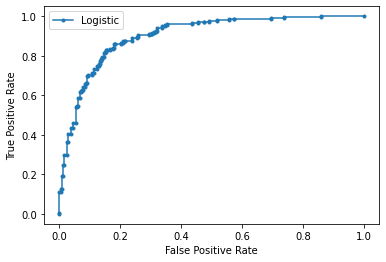

In [33]:
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()